# =======================================
# MOVIES DATASET EXPLORATORY DATA ANALYSIS
# =======================================

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('movies.csv')

### =============================================
### 2. DATA OVERVIEW
### =============================================

In [3]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
data.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [6]:
print(data.shape)

(9999, 9)


- We take look at missing data

Missing values:
------------------
MOVIES: 0.00% (0)
YEAR: 6.44% (644)
GENRE: 0.80% (80)
RATING: 18.20% (1820)
ONE-LINE: 0.00% (0)
STARS: 0.00% (0)
VOTES: 18.20% (1820)
RunTime: 29.58% (2958)
Gross: 95.40% (9539)


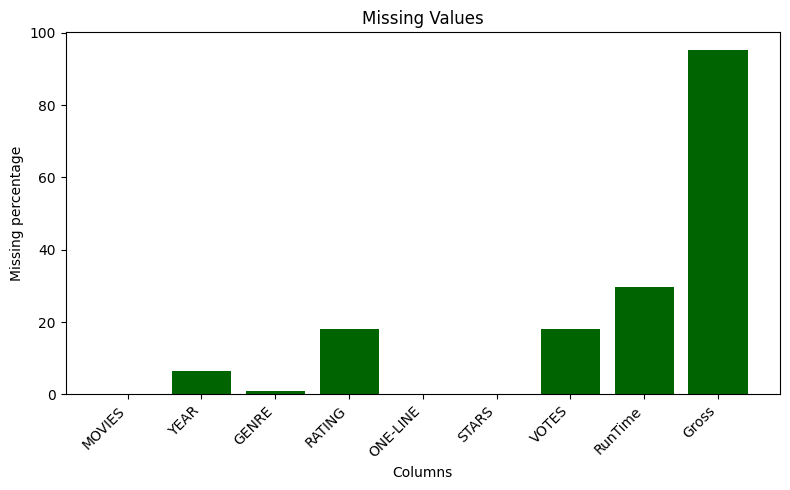

In [7]:
print("Missing values:\n------------------")
def missing_values():
    for col in data.columns:
        m_values = data[col].isna().sum()
        percentage = (m_values/data.shape[0])*100
        print(f'{col}: {percentage:.2f}% ({m_values})')
missing_values()

missing_percent = (data.isna().sum() / data.shape[0]) * 100
plt.figure(figsize=(8, 5))
plt.bar(missing_percent.index, missing_percent.values, color='darkgreen')
plt.xlabel("Columns")
plt.ylabel("Missing percentage")
plt.title("Missing Values")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.savefig('plots/01_missing_vals', dpi=300, bbox_inches='tight')
plt.show()

### =============================================
### 3. Data Cleaning
### =============================================

In [8]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


- First step will be removing all '\n' signs

In [9]:
data['GENRE'] = data['GENRE'].str.replace('\n','').str.strip()
data['ONE-LINE'] = data['ONE-LINE'].str.replace('\n','').str.strip()
data['STARS'] = data['STARS'].str.replace('\n','').str.strip()

In [10]:
data[['GENRE','ONE-LINE','STARS']].head()

,GENRE,ONE-LINE,STARS
0,"Action, Horror, Thriller",A woman with a mysterious illness is forced in...,Director:\rPeter Thorwarth\r| \r Stars:\rPe...
1,"Animation, Action, Adventure",The war for Eternia begins again in what may b...,"Stars:\rChris Wood, \rSarah Michelle Gellar, \..."
2,"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:\rAndrew Lincoln, \rNorman Reedus, \rMel..."
3,"Animation, Adventure, Comedy",An animated series that follows the exploits o...,"Stars:\rJustin Roiland, \rChris Parnell, \rSpe..."
4,"Action, Crime, Horror","A prequel, set before the events of Army of th...",Director:\rMatthias Schweighöfer\r| \r Star...


- Then we will change YEAR column, where we extract only digits and change to int type

In [11]:
data['YEAR'] = data['YEAR'].str.extract('(\d{4})').astype('str')
data['YEAR'] = pd.to_datetime(data['YEAR'], format='%Y', errors='coerce').dt.year.astype('Int64')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\3970865066.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['YEAR'] = data['YEAR'].str.extract('(\d{4})').astype('str')


In [12]:
data['YEAR'].head()

0    2021
1    2021
2    2010
3    2013
4    2021
Name: YEAR, dtype: Int64

- Now we will take STARS column and separate directors and stars into 2 separate columns

In [13]:
def extract_info(s):
    info = {'Directors':'', 'Stars':''}

    parts = [p.strip() for p in s.split('|')]
    for part in parts:
        if part.startswith('Director') or part.startswith('Directors'):
            info['Directors'] = part.split(':',1)[1].strip()
        if part.startswith('Star') or part.startswith('Stars'):
            info['Stars'] = part.split(':',1)[1].strip()
    return pd.Series(info)


data[['Directors', 'Stars']] = data['STARS'].apply(extract_info)
data.drop(columns='STARS', inplace=True)

In [14]:
data[['Directors', 'Stars']] = data[['Directors', 'Stars']].replace("","Unknown")

In [15]:
data[['Directors','Stars']].head()

,Directors,Stars
0,Peter Thorwarth,"Peri Baumeister, \rCarl Anton Koch, \rAlexande..."
1,Unknown,"Chris Wood, \rSarah Michelle Gellar, \rLena He..."
2,Unknown,"Andrew Lincoln, \rNorman Reedus, \rMelissa McB..."
3,Unknown,"Justin Roiland, \rChris Parnell, \rSpencer Gra..."
4,Matthias Schweighöfer,"Matthias Schweighöfer, \rNathalie Emmanuel, \r..."


- We will look at GROSS column and after checking if any gross exceeded milions, we will strip value of useless signs, convert dollars into euros and change its type to float

In [16]:
known_gross = data[(data['Gross'].notna()) & (~data['Gross'].str.endswith('M', na=False))]
known_gross

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Directors,Stars


In [17]:

data.rename(columns={'Gross':'Gross_EUR'}, inplace=True)

def clean_val(val):
    if pd.notna(val):
        float_val = float(str(val).replace('$', '').replace('M', ''))
        currency_change = (float_val * 1000000)*0.85
        return currency_change
    else:
        return val
    
data['Gross_EUR'] = data['Gross_EUR'].apply(clean_val)
data['Gross_EUR']=data['Gross_EUR'].fillna(0)
data['Gross_EUR'] = data['Gross_EUR'].astype(float)


In [18]:
data['Gross_EUR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9999 entries, 0 to 9998
Series name: Gross_EUR
Non-Null Count  Dtype  
--------------  -----  
9999 non-null   float64
dtypes: float64(1)
memory usage: 78.2 KB


- Remove duplicates

In [19]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

431


- We remove ',' from VOTES rows and change it to float

In [20]:
data['VOTES'] = data['VOTES'].astype('str').str.replace(',','').str.strip()
data['VOTES'] = pd.to_numeric(data['VOTES'], errors='coerce')
data['VOTES'].fillna(0, inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\3993275974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['VOTES'].fillna(0, inplace=True)


- We fill missing GENRE values with the most common genre for each director, and any remaining NaNs are set to 'Unknown'.

In [21]:
data['Directors'].value_counts()

Directors
Unknown            3448
Adam Heydt           28
Brian Smith          21
Oliver Driver        21
Giancarlo Volpe      19
                   ... 
Navot Papushado       1
Pamela Fryman         1
Jason Winer           1
Romeo Tirone          1
Brian Kirk            1
Name: count, Length: 3709, dtype: int64

In [22]:
mode_genre = data.groupby('Directors')['GENRE'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
data['GENRE'] = data['GENRE'].fillna(data['Directors'].map(mode_genre))
data['GENRE'] = data['GENRE'].fillna('Unknown')  
data['GENRE'].isna().sum()

np.int64(0)

- Impute RunTime, RATING and YEAR columns with medians

In [23]:
print(data['RunTime'].mean())
print(data['RATING'].mean())
print(int(data['YEAR'].mean()))

68.87414383561644
6.919698824681684
2016


In [24]:
data['RunTime'] = data['RunTime'].fillna(round(data['RunTime'].mean(), 1))
data['RATING'] = data['RATING'].fillna(round(data['RATING'].median(), 1))
data['YEAR'] = data['YEAR'].fillna(int(data['YEAR'].mean()))


- In ONE-LINE columns, we change Add a Plot rows with Unknown

In [25]:
data['ONE-LINE'] = data['ONE-LINE'].str.replace('Add a Plot', 'Unknown')

- Look at data after cleaning

In [26]:
print("Missing values now:\n------------------")
missing_values()

Missing values now:
------------------
MOVIES: 0.00% (0)
YEAR: 0.00% (0)
GENRE: 0.00% (0)
RATING: 0.00% (0)
ONE-LINE: 0.00% (0)
VOTES: 0.00% (0)
RunTime: 0.00% (0)
Gross_EUR: 0.00% (0)
Directors: 0.00% (0)
Stars: 0.00% (0)


In [27]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross_EUR,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062.0,121.0,0.0,Peter Thorwarth,"Peri Baumeister, \rCarl Anton Koch, \rAlexande..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870.0,25.0,0.0,Unknown,"Chris Wood, \rSarah Michelle Gellar, \rLena He..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,0.0,Unknown,"Andrew Lincoln, \rNorman Reedus, \rMelissa McB..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849.0,23.0,0.0,Unknown,"Justin Roiland, \rChris Parnell, \rSpencer Gra..."
4,Army of Thieves,2021,"Action, Crime, Horror",7.1,"A prequel, set before the events of Army of th...",0.0,68.9,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, \rNathalie Emmanuel, \r..."


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MOVIES     9568 non-null   object 
 1   YEAR       9568 non-null   Int64  
 2   GENRE      9568 non-null   object 
 3   RATING     9568 non-null   float64
 4   ONE-LINE   9568 non-null   object 
 5   VOTES      9568 non-null   float64
 6   RunTime    9568 non-null   float64
 7   Gross_EUR  9568 non-null   float64
 8   Directors  9568 non-null   object 
 9   Stars      9568 non-null   object 
dtypes: Int64(1), float64(4), object(5)
memory usage: 831.6+ KB


- Now we see we eliminated all missing values and hopefully cleaned dataset enough so future ml model will be as precise as it can be

### =============================================
### 4. EXPLORATORY ANALYSIS
### =============================================

In [29]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross_EUR,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062.0,121.0,0.0,Peter Thorwarth,"Peri Baumeister, \rCarl Anton Koch, \rAlexande..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870.0,25.0,0.0,Unknown,"Chris Wood, \rSarah Michelle Gellar, \rLena He..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,0.0,Unknown,"Andrew Lincoln, \rNorman Reedus, \rMelissa McB..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849.0,23.0,0.0,Unknown,"Justin Roiland, \rChris Parnell, \rSpencer Gra..."
4,Army of Thieves,2021,"Action, Crime, Horror",7.1,"A prequel, set before the events of Army of th...",0.0,68.9,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, \rNathalie Emmanuel, \r..."


- Top 10 highest-rated movies

,MOVIES,YEAR,RATING
7640,BoJack Horseman,2014,9.9
8510,Avatar: The Last Airbender,2005,9.9
9892,Dexter,2006,9.8
8541,The Midnight Gospel,2020,9.7
8637,She-Ra and the Princesses of Power,2018,9.7
8767,Dark,2017,9.7
7792,Anne,2017,9.6
7870,The Dragon Prince,2018,9.6
8656,Meerkat Manor,2005,9.6
7308,Rick and Morty,2013,9.5


C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\2589228372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='RATING', y='MOVIES', palette='viridis')


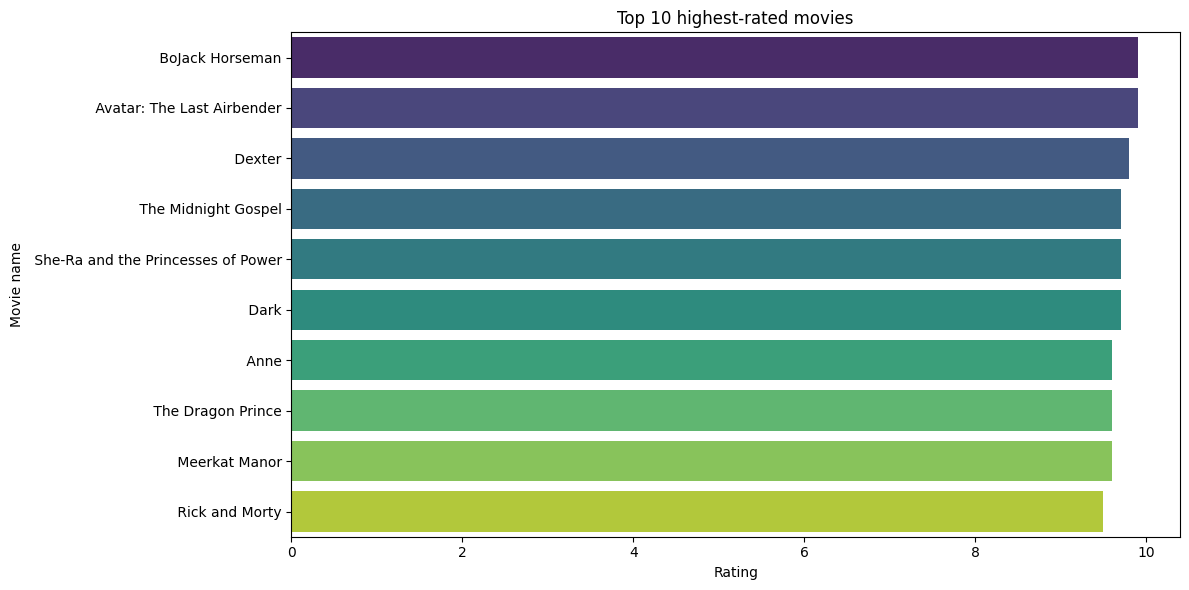

In [30]:
top10 = data.sort_values(by='RATING', ascending=False).drop_duplicates(subset='MOVIES').head(10)
display(top10[['MOVIES', 'YEAR', 'RATING']])

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='RATING', y='MOVIES', palette='viridis')
plt.title('Top 10 highest-rated movies')
plt.xlabel('Rating')
plt.ylabel('Movie name')
plt.tight_layout()
plt.savefig('plots/02_Top_10_highest-rated_movies', dpi=300, bbox_inches='tight')
plt.show()


- Distribution of movie rankings

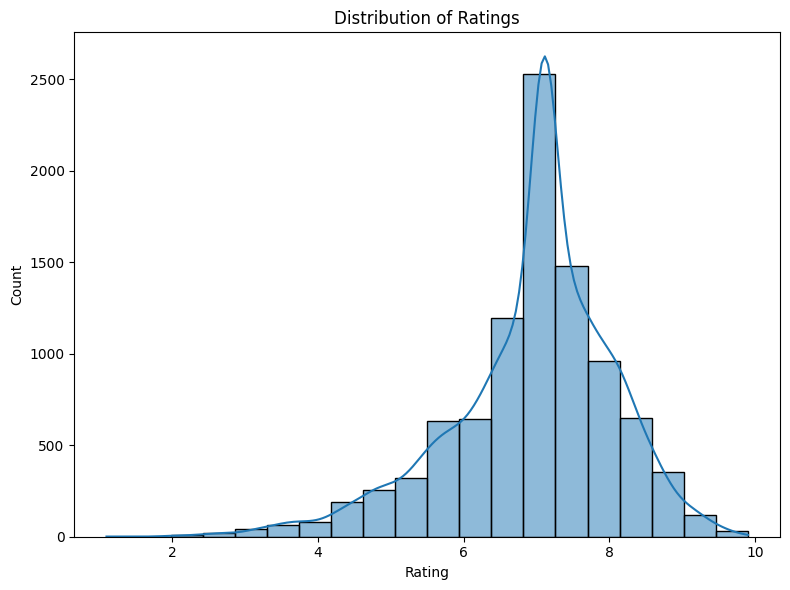

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(data=data['RATING'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.tight_layout()
plt.savefig('plots/03_Distribution_of_Ratings', dpi=300, bbox_inches='tight')
plt.show()

- Most common genre

In [32]:
from collections import Counter

all_genres = data['GENRE'].str.split(',')
genres = []
unique_genres = []
for sub in all_genres:
    for x in sub:
        genres.append(x)
        if x not in unique_genres:
            unique_genres.append(x)

genres_count = Counter(genres)
display(genres_count)

genres_count_df = pd.DataFrame(genres_count.items(), columns=['Genre', 'Count'])
top10_genres = genres_count_df.sort_values(by='Count', ascending=False).head(10)
display(top10_genres)


Counter({' Drama': 2503,
         'Comedy': 1916,
         'Animation': 1630,
         'Drama': 1616,
         ' Adventure': 1448,
         'Documentary': 1219,
         'Action': 1191,
         ' Action': 977,
         ' Thriller': 829,
         ' Comedy': 822,
         ' Mystery': 818,
         ' Romance': 797,
         ' Crime': 774,
         'Crime': 745,
         ' Fantasy': 507,
         ' Family': 390,
         ' Horror': 359,
         ' History': 344,
         ' Sci-Fi': 285,
         'Adventure': 196,
         'Reality-TV': 194,
         ' Sport': 186,
         ' Short': 180,
         ' Reality-TV': 176,
         'Biography': 169,
         ' Music': 169,
         'Horror': 159,
         ' Biography': 142,
         'Game-Show': 94,
         'Talk-Show': 68,
         'Short': 67,
         'Thriller': 66,
         ' Musical': 57,
         'Family': 52,
         ' War': 47,
         'Romance': 39,
         'Fantasy': 32,
         'Music': 31,
         'Mystery': 22,
         ' Tal

,Genre,Count
9,Drama,2503
13,Comedy,1916
3,Animation,1630
6,Drama,1616
5,Adventure,1448
22,Documentary,1219
0,Action,1191
4,Action,977
2,Thriller,829
7,Comedy,822


C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\966793171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='Genre', y='Count', palette='viridis')


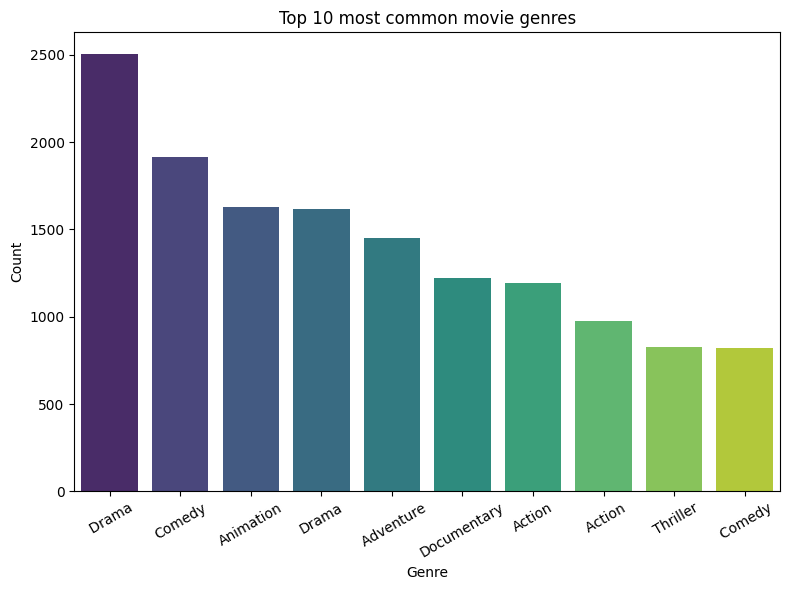

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(data=top10_genres, x='Genre', y='Count', palette='viridis')
plt.xticks(rotation=30)
plt.title('Top 10 most common movie genres')
plt.tight_layout()
plt.savefig('plots/04_Top_10_most_common_movie_genres', dpi=300, bbox_inches='tight')
plt.show()

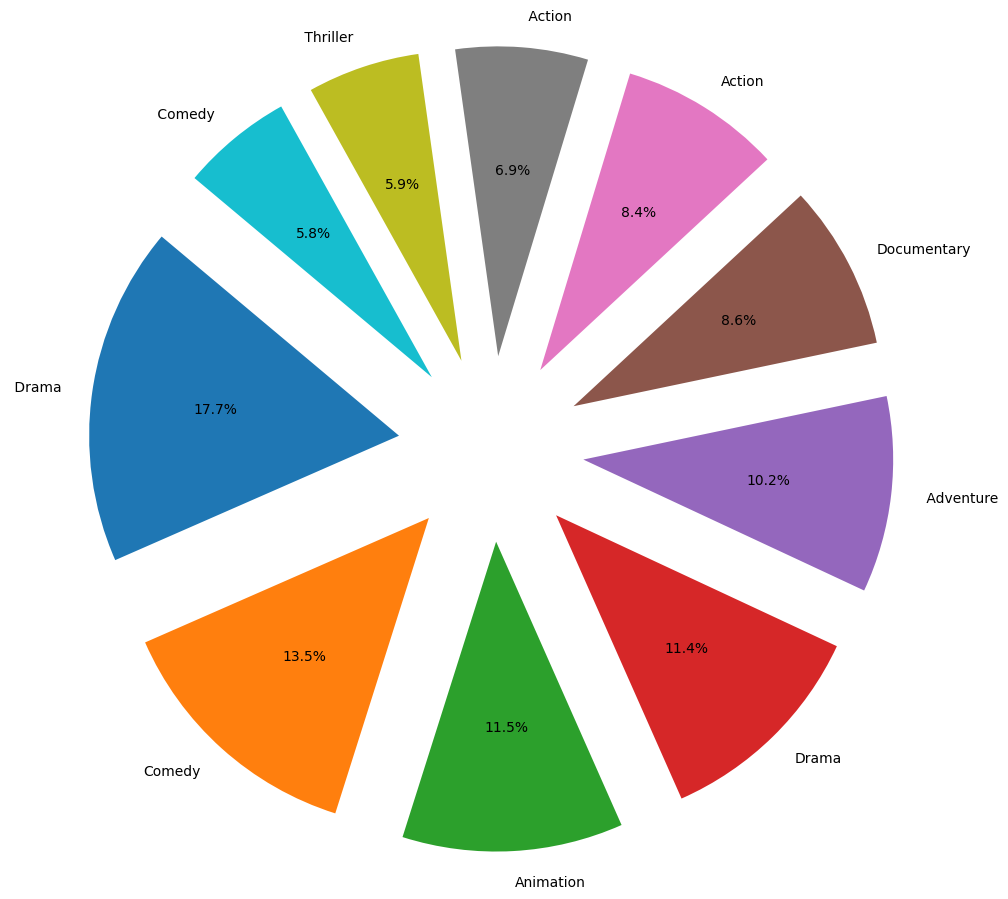

In [43]:
plt.figure(figsize=(10,9))
plt.pie(top10_genres['Count'], labels=top10_genres['Genre'], autopct='%1.1f%%',startangle=140, explode =[.3]*10)
plt.tight_layout()
plt.savefig('plots/05_Genres_pie', dpi=300, bbox_inches='tight')
plt.show()

- Trend in making films

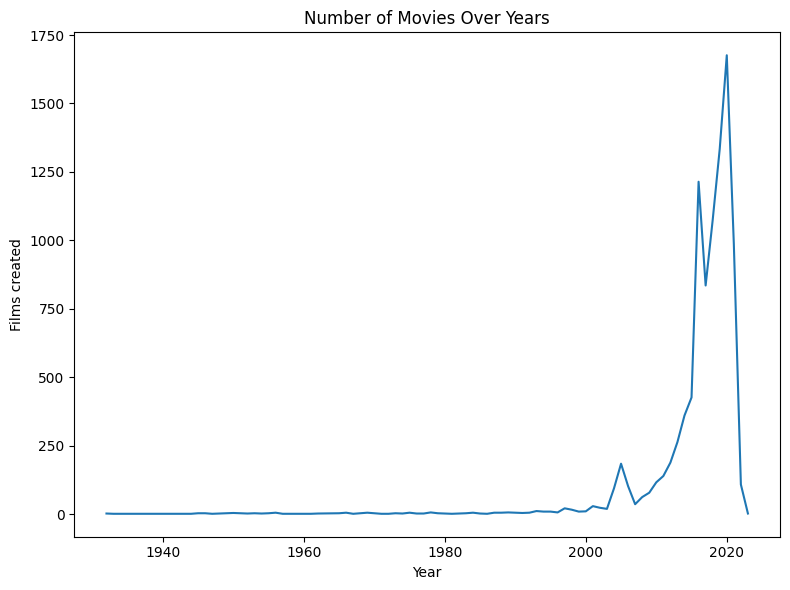

In [35]:
year_trend = data['YEAR'].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.lineplot(x=year_trend.index, y=year_trend.values)
plt.xlabel('Year')
plt.ylabel('Films created')
plt.title('Number of Movies Over Years')
plt.tight_layout()
plt.savefig('plots/06_Number_of_Movies_Over_Years', dpi=300, bbox_inches='tight')
plt.show()

- Best directors (with min 10 films directed) by average rating

,avg_rating,num_movies
Directors,,
Baran bo Odar,9.029412,17
Ethan Spaulding,8.775000,12
Simon Bennett,8.723077,13
Giancarlo Volpe,8.663158,19
Lauren MacMullan,8.640000,10
"Norm Hiscock, \rGary Howsam, \rMike Smith, \rJohn Paul Tremblay, \rRobb Wells",8.360000,10
Oliver Driver,8.357143,21
Rotem Shamir,8.138462,13
Hayao Miyazaki,8.060000,10


C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\2146705025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_directors, x='avg_rating', y='Directors', palette='viridis')
) missing from font(s) DejaVu Sans.kernel_1924\2146705025.py:11: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.kernel_1924\2146705025.py:12: UserWarning: Glyph 13 (
  plt.savefig('plots/07_Best_directors', dpi=300, bbox_inches='tight')
) missing from font(s) DejaVu Sans.\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


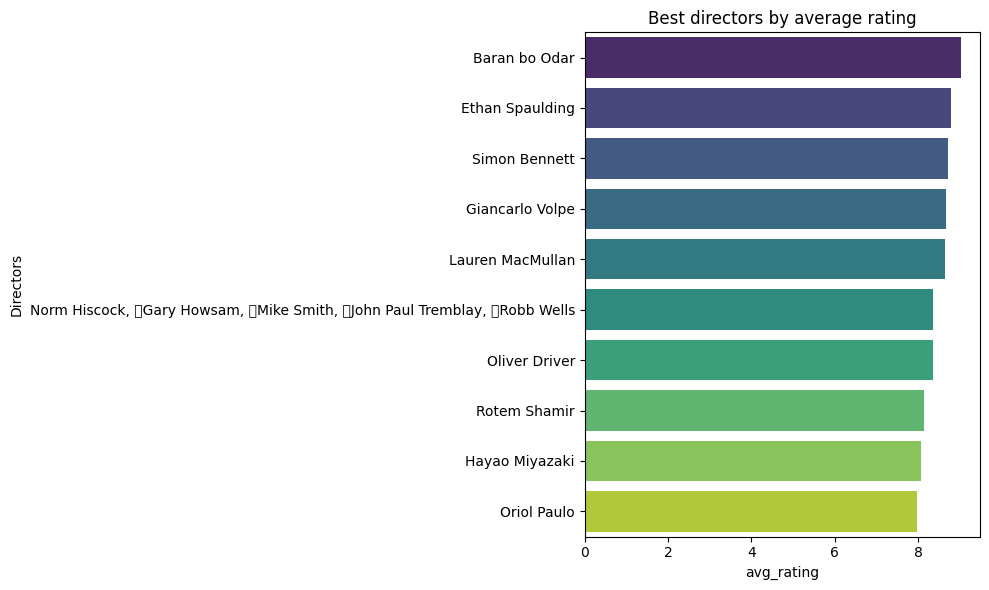

In [36]:
director_stats = data.groupby('Directors').agg({'RATING': ['mean', 'count']})
director_stats.columns = ['avg_rating', 'num_movies']
director_stats = director_stats[director_stats['num_movies'] >= 10]
top10_directors = director_stats.sort_values(by='avg_rating', ascending=False)
top10_directors = pd.DataFrame(top10_directors).head(10)
display(top10_directors)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_directors, x='avg_rating', y='Directors', palette='viridis')
plt.title('Best directors by average rating')
plt.tight_layout()
plt.savefig('plots/07_Best_directors', dpi=300, bbox_inches='tight')
plt.show()


- What is the relationship between year and and rating?

C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\889304064.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='YEAR', ax=ax[0], shade=True, color='red')


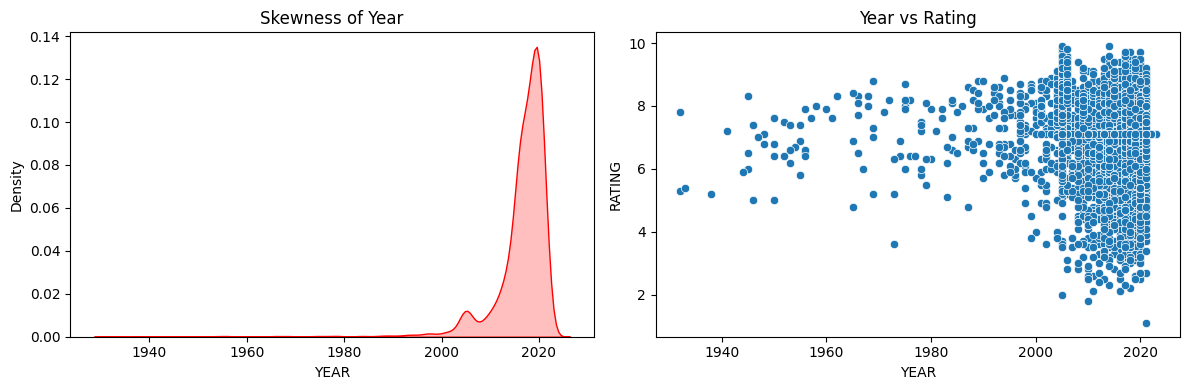

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.kdeplot(data=data, x='YEAR', ax=ax[0], shade=True, color='red')
ax[0].set_title('Skewness of Year')

sns.scatterplot(data=data, x='YEAR', y='RATING', ax=ax[1])
ax[1].set_title('Year vs Rating')


plt.tight_layout()
plt.savefig('plots/08_Year_vs_Rating', dpi=300, bbox_inches='tight')
plt.show()


- What is the relationship between runtime and rating?

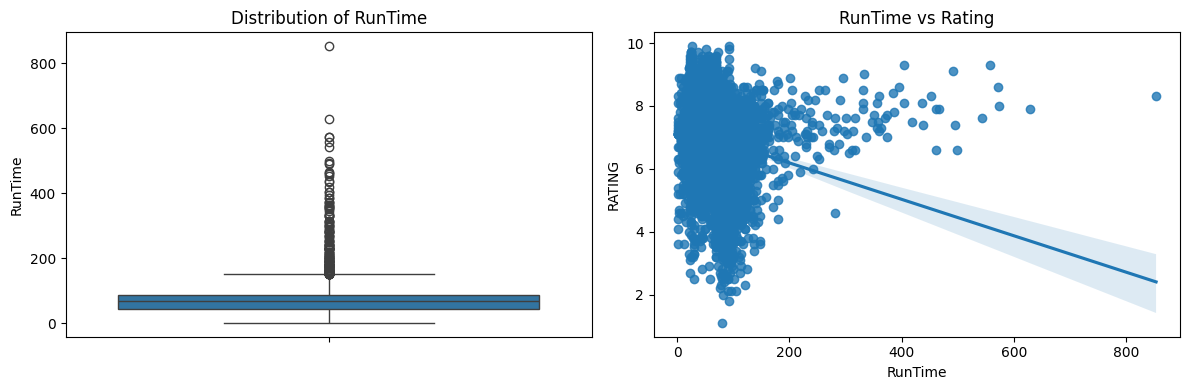

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross_EUR,Directors,Stars
3977,Miraculous: Ladybug & Cat Noir: Happy Birthday...,2017,"Animation, Short",7.3,"Break dancing, dragons, balloons and a DJ: Lad...",34.0,1.0,0.0,Unknown,Unknown
5358,Pokémon: Happy Birthday to You!,2017,"Animation, Short",5.4,"Today is your big day, and Ash, Pikachu and al...",21.0,1.0,0.0,Unknown,Unknown
5888,All Hail King Julien: Happy Birthday to You!,2017,"Animation, Short",4.4,Nobody parties like King Julien. And today he'...,7.0,1.0,0.0,Unknown,Unknown
5872,Beat Bugs: Happy Birthday to You!,2017,"Animation, Short",7.1,They say it's your birthday - and there's no o...,0.0,1.0,0.0,Unknown,Unknown
2954,Trollhunters: Happy Birthday to You!,2017,"Animation, Short",7.5,What's better than a birthday? How about a cho...,24.0,1.0,0.0,Unknown,Unknown


In [38]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=data['RunTime'], ax=ax[0])
ax[0].set_title('Distribution of RunTime')

sns.regplot(data=data, x='RunTime', y='RATING', ax=ax[1], x_jitter=.17)
ax[1].set_title('RunTime vs Rating')

plt.tight_layout()
plt.savefig('plots/08_Runtimr_vs_Rating', dpi=300, bbox_inches='tight')
plt.show()

shortest_runtimes = data.sort_values(by='RunTime')
shortest_runtimes.head()

- How does the runtime of movies vary across genres?

C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\1333299087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_explode, x='GENRE', y='RunTime', palette='tab10')


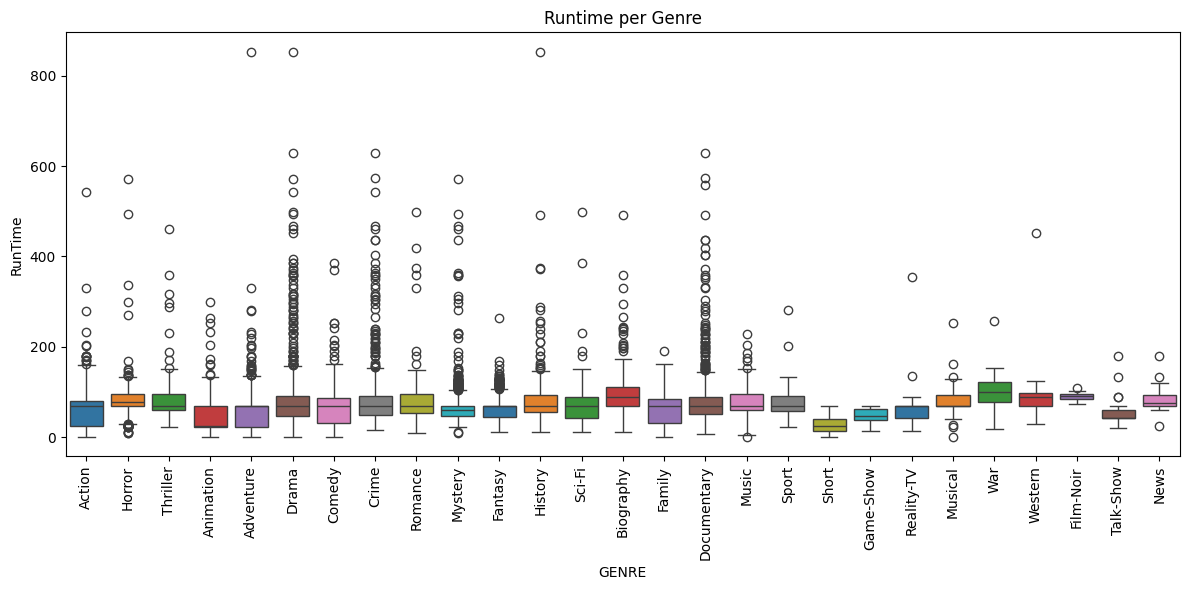

In [39]:
df_explode = data[data['GENRE'] != 'Unknown'].copy()
df_explode['GENRE'] = df_explode['GENRE'].str.split(', ')
df_explode = df_explode.explode('GENRE')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_explode, x='GENRE', y='RunTime', palette='tab10')
plt.xticks(rotation=90)
plt.title("Runtime per Genre")
plt.tight_layout()
plt.savefig('plots/08_Runtime_per_Genre', dpi=300, bbox_inches='tight')
plt.show()

- Do certain genres tend to have higher ratings?

C:\Users\MSI\AppData\Local\Temp\ipykernel_1924\982709459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_explode, x='GENRE', y='RATING', palette='tab10')


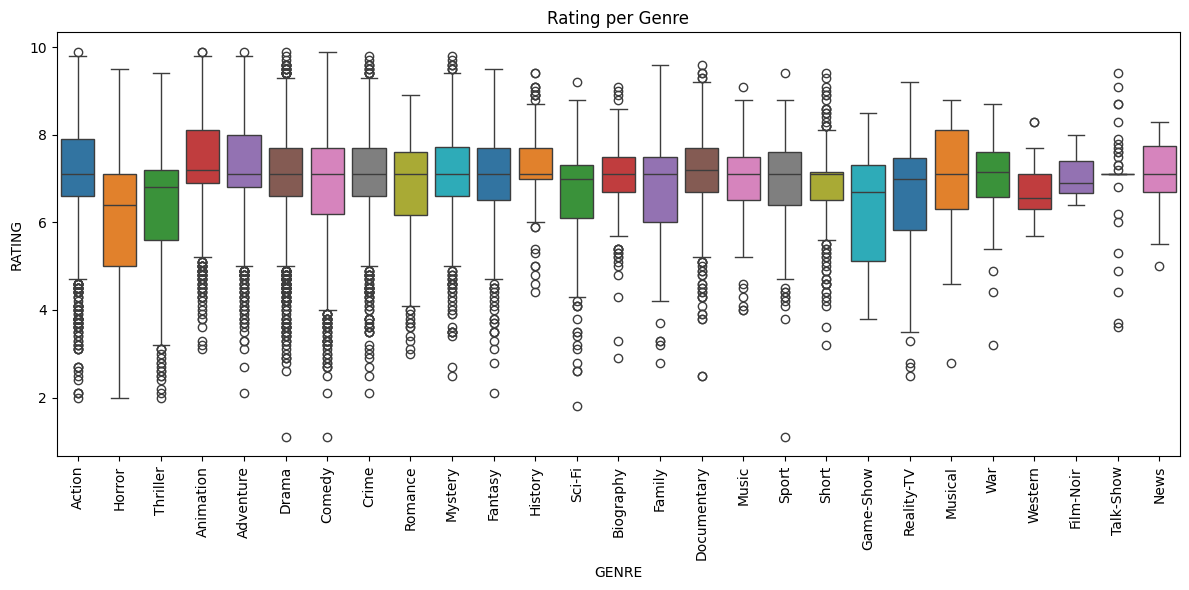

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_explode, x='GENRE', y='RATING', palette='tab10')
plt.xticks(rotation=90)
plt.title("Rating per Genre")
plt.tight_layout()
plt.savefig('plots/09_Rating_per_Genre', dpi=300, bbox_inches='tight')
plt.show()

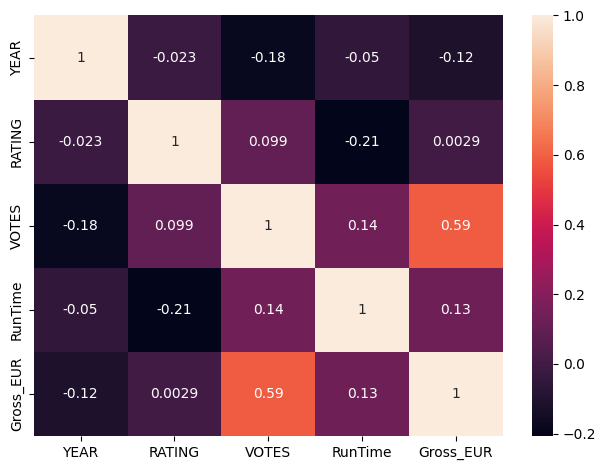

In [42]:
num_cols = data[['YEAR', 'RATING', 'VOTES', 'RunTime', 'Gross_EUR']]
corr = num_cols.corr()

sns.heatmap(corr , annot=True)
plt.tight_layout()
plt.savefig('plots/10_Heatmap', dpi=300, bbox_inches='tight')
plt.show()